# Imports 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D

# Rossler System

### Define Parameters

In [125]:
a = 0.5
b = 2.0
c = 4.0

# reservoir parameters 
N = 400
rho = 1.0                        # spectral radius 
D = 20                           # average degree 
sigma = 1.0                      # scale of input weights 
xi = 1.0                         # bias constant 
alpha = 1.0                      # leakage rate 
delta_t = 0.1                    # time interval 
T = 260                          # length of training phase 
K = int(T / delta_t)             # number of steps
t = np.linspace(0, T, 800)       # time series ---> for 800 sample points

x = np.zeros(t.shape[0])
y = np.zeros(t.shape[0])
z = np.zeros(t.shape[0])

### Generate Data 

In [126]:
def num_rossler(x_n, y_n, z_n):
    global a, b, c 
    
    x_n1 = x_n + delta_t * (- y_n - z_n)
    y_n1 = y_n + delta_t * (x_n + a * y_n)
    z_n1 = z_n + delta_t * (b + z_n * (x_n - c))   

    return x_n1, y_n1, z_n1

for i in range(x.size-1):
    x[i+1], y[i+1], z[i+1] = num_rossler(x[i], y[i], z[i])

### Visualize

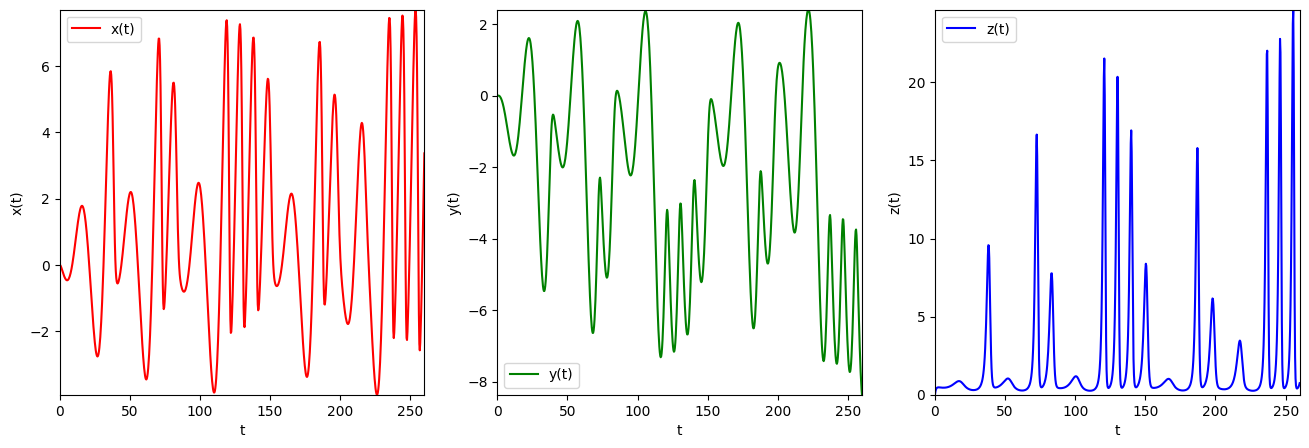

In [132]:
fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(t, x, color='red', label='x(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.legend()
ax1.axis((0, 260, min(x), max(x)))

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(t, y, color='green', label='y(t)')
ax2.set_xlabel('t')
ax2.set_ylabel('y(t)')
ax2.legend()
ax2.axis((0, 260, min(y), max(y)))

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(t, z, color='blue', label='z(t)')
ax3.set_xlabel('t')
ax3.set_ylabel('z(t)')
ax3.legend()
ax3.axis((0, 260, min(z), max(z)))

plt.show()